In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np

from utils import OUR_NAME
from sky_spot import utils
from plot import *

sns.set_style('whitegrid')

InitMatplotlib(7, 7)

RESTART_OVERHEAD_HOURS = 0.2
DDL = 'search'
TASK = 48
dfs = []


for restart_overhead in [0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]:
# for restart_overhead in [0.1, 0.2, 0.3, 0.4, 0.5]:
    results_path = f'../../results/real/ddl={DDL}+task={TASK}+overhead={restart_overhead:.2f}'
    # results_path = f'../../results-plot/real/2023-02-15/ddl={DDL}+task={TASK}+overhead={restart_overhead:.2f}'

    for result_path in os.listdir(results_path):
        if not result_path.endswith('.csv'):
            continue
        df = pd.read_csv(os.path.join(results_path, result_path))
        df['env_path'] = result_path
        if len(df['avg_wait_hours'].values) == 0:
            print(result_path)
        print(result_path, df['avg_spot_hours'].values[0], df['avg_wait_hours'].values[0])
        df['spot_fraction'] = df['avg_spot_hours'] / (df['avg_wait_hours'] + df['avg_spot_hours'])
        if 'deadline_hours' in df.columns:
            df['task_fraction'] = df['task_duration_hours'] / df['deadline_hours']
            df['deadline_ratio'] = df['deadline_hours'] / df['task_duration_hours']
        else:
            df['task_fraction'] = df['task_duration_hours'] / DDL
        df.drop_duplicates(inplace=True)
        df['overhead'] = restart_overhead
        dfs.append(df)

is_2_month_data = '2023-02-15' in results_path
dfs = pd.concat(dfs, ignore_index=True)
dfs

use_tex True 
font_size 7 
title_size 7
us-west-2b_v100_1.csv 1.962962962962963 1.3351851851851853
us-west-2a_k80_8.csv 1.8258426966292136 1.4925925925925925
us-west-2b_v100_8.csv 0.579047619047619 1.1171428571428572
us-west-2a_v100_1.csv 2.290262172284645 1.056818181818182
us-west-2b_k80_8.csv 1.28641975308642 0.9123456790123456
us-west-2a_k80_1.csv 6.5852713178294575 0.3253968253968253
us-west-2b_k80_1.csv 1.700757575757576 5.045454545454546
us-west-2a_v100_8.csv 0.6913145539906104 1.3892773892773893
us-west-2b_v100_1.csv 1.962962962962963 1.3351851851851853
us-west-2a_k80_8.csv 1.8258426966292136 1.4925925925925925
us-west-2b_v100_8.csv 0.579047619047619 1.1171428571428572
us-west-2a_v100_1.csv 2.290262172284645 1.056818181818182
us-west-2b_k80_8.csv 1.28641975308642 0.9123456790123456
us-west-2a_k80_1.csv 6.5852713178294575 0.3253968253968253
us-west-2b_k80_1.csv 1.700757575757576 5.045454545454546
us-west-2a_v100_8.csv 0.6913145539906104 1.3892773892773893
us-west-2b_v100_1.csv 1.

,strategy,env_path,avg_spot_hours,avg_wait_hours,task_duration_hours,deadline_hours,avg_cost,costs,std_cost,num_slices,spot_fraction,task_fraction,deadline_ratio,overhead,keep_on_demand,slice_interval_hours
0,strawman,us-west-2b_v100_1.csv,1.962963,1.335185,48,52,135.113987,NaN,19.419080,NaN,0.595171,0.923077,1.083333,0.02,NaN,NaN
1,strawman,us-west-2b_v100_1.csv,1.962963,1.335185,48,56,125.148472,NaN,26.514527,NaN,0.595171,0.857143,1.166667,0.02,NaN,NaN
2,on_demand,us-west-2b_v100_1.csv,1.962963,1.335185,48,52,147.390000,NaN,0.000000,NaN,0.595171,0.923077,1.083333,0.02,NaN,NaN
3,strawman,us-west-2b_v100_1.csv,1.962963,1.335185,48,60,120.769050,NaN,27.602762,NaN,0.595171,0.800000,1.250000,0.02,NaN,NaN
4,on_demand,us-west-2b_v100_1.csv,1.962963,1.335185,48,56,147.390000,NaN,0.000000,NaN,0.595171,0.857143,1.166667,0.02,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42497,quick_optimal_more_sliced_by_num,us-west-2a_v100_8.csv,0.691315,1.389277,48,84,143.012647,NaN,20.096238,4.0,0.332268,0.571429,1.750000,0.50,NaN,NaN
42498,quick_optimal_more_sliced_by_num,us-west-2a_v100_8.csv,0.691315,1.389277,48,84,142.220887,NaN,21.359653,2.0,0.332268,0.571429,1.750000,0.50,NaN,NaN
42499,quick_optimal_more_sliced_by_num,us-west-2a_v100_8.csv,0.691315,1.389277,48,80,154.482844,NaN,16.272279,16.0,0.332268,0.600000,1.666667,0.50,NaN,NaN
42500,quick_optimal_more_sliced_by_num,us-west-2a_v100_8.csv,0.691315,1.389277,48,92,145.047197,NaN,18.629375,8.0,0.332268,0.521739,1.916667,0.50,NaN,NaN


In [2]:
import json
import collections

def optimal_with_average(env_path, ddls):
    trace_path = results_path.replace('results', 'exp')
    if not env_path.endswith('.json'):
        env_path += '.json'
    trace_path = os.path.join(trace_path, 'real', env_path, 'traces', 'random_start')

    vm_cost = utils.COSTS[utils.ClusterType.ON_DEMAND]
    spot_cost = utils.COSTS[utils.ClusterType.SPOT]
    costs = collections.defaultdict(list)
    for trace_file in glob.glob(trace_path + '/*.json'):
        with open(trace_file) as f:
            trace = json.load(f)
        availability_trace = 1 - np.array(trace['data'])
        gap_seconds = trace['metadata']['gap_seconds']
        padded = np.array([0] + availability_trace.tolist() + [0])
        start_end = padded[1:] - padded[:-1]
        lengths = np.where(start_end == -1)[0] - np.where(start_end == 1)[0]
        avg_lifetime = np.mean(lengths) * gap_seconds / 3600

        wait_padded = np.array([0] + (1 - availability_trace).tolist() + [0])
        wait_start_end = wait_padded[1:] - wait_padded[:-1]
        wait_lengths = np.where(wait_start_end == -1)[0] - np.where(wait_start_end == 1)[0]
        avg_wait = np.mean(wait_lengths) * gap_seconds / 3600

        for ddl in ddls:
            d = RESTART_OVERHEAD_HOURS
            if avg_lifetime - d < 0 or spot_cost * avg_lifetime / (avg_lifetime - d) >= vm_cost:
                cost = vm_cost * (TASK + d)
                costs[ddl].append(cost)
                continue
            f = avg_lifetime / (avg_lifetime + avg_wait)
            R_v = TASK - f * (avg_lifetime - d) / avg_lifetime * ddl
            if R_v < 0:
                cost = spot_cost * (TASK / (avg_lifetime - d) * d + TASK)
            else:
                cost = f * ddl * spot_cost + (R_v / (avg_wait - d) * d + R_v) * vm_cost
            costs[ddl].append(cost)
    
    costs = {ddl: np.mean(costs[ddl]) for ddl in costs}
    return pd.DataFrame(
        {
            'strategy': ['optimal_with_average'] * len(costs),
            'deadline_hours': list(costs.keys()),
            'avg_cost': list(costs.values()),
            'env_path': [env_path] * len(costs),
            'task_duration_hours': [TASK] * len(costs)
        }
    )
        
    

In [26]:
NORMALIZE_BY_ON_DEMAND = False
NORMALIZE_BY_ON_DEMAND = True

USE_OPTIMAL_SLICE_HOUR = False




# X_AXIS_MAX = 76
X_AXIS_MAX = 85

x_axis = 'task_fraction'
X_AXIS_MIN = 0.57

DD_SCALE = 2

# OPTIMAL_SLICE0 = 4
OPTIMAL_SLICE = 8
OPTIMAL_SLICE_HOUR= 6
SLICE_USE_BEST = True
NUM_SLICE = 4
if SLICE_USE_BEST:
    NUM_SLICE = 'best'

v100_base_cost = utils.COSTS[utils.ClusterType.ON_DEMAND]
cost_scales = utils.COST_SCALES
if NORMALIZE_BY_ON_DEMAND:
    for name in cost_scales:
        cost_scales = {name: 1 for name in cost_scales}

print(cost_scales)


strategy_name_map = {
    'on_demand': 'on demand',
    'strawman': 'Greedy',
    'quick_optimal': 'Omniscient',
    # 'quick_optimal_paranoid': 'Paranoid',
    # 'ideal_ilp_overhead': 'Omniscient',
}
if USE_OPTIMAL_SLICE_HOUR:
    strategy_name_map.update({
        # f'ideal_ilp_overhead_sliced_{OPTIMAL_SLICE_HOUR}': f'Omniscient\n({OPTIMAL_SLICE_HOUR}h look ahead)',
    })
else:
    strategy_name_map.update({
        # f'ideal_ilp_overhead_sliced_by_num_{OPTIMAL_SLICE}': f'Omniscient ({OPTIMAL_SLICE})',
        # f'quick_optimal_sliced_by_num_{OPTIMAL_SLICE}': f'quick optimal (sliced {OPTIMAL_SLICE})',
        f'quick_optimal_more_sliced_by_num_{OPTIMAL_SLICE}': f'Omniscient ({OPTIMAL_SLICE} slices)',
    })

strategy_name_map.update({
    # 'optimal_with_average': 'optimal (avg)',
    # 'time_sliced_by_num': f'Time Sliced',
    ## 'loose_time_sliced_by_num': 'loose sliced (max \#slices)',
    # 'loose_time_sliced_by_num': f'loose sliced (sliced {NUM_SLICE})',
    ## 'loose_time_sliced_vdt_by_num': f'loose sliced (VDT sliced {NUM_SLICE})',
    # 'rc_threshold': 'deficit limited',
    ## 'rc_lw_threshold': 'deficit limited (LW)',
    ## 'rc_dc_threshold': 'limited-deficit (DC)',
    ## 'rc_dc_threshold (DC=1)': 'limited-deficit (DC=1)',
    ## 'rc_dd_threshold': f'limited-deficit ({DD_SCALE}DD)',
    # 'rc_vd_threshold': f'deficit limited (VD)',
    # 'rc_vdt_threshold': f'deficit limited (VDT)',
    # 'rc_v2dt_threshold': f'deficit limited (V2DT)',
    'rc_cr_threshold': f'{OUR_NAME} (Ours)',
    # 'rc_cr_no_keep_threshold': f'{OUR_NAME} (Ours, no keep)',
    'rc_next_spot_threshold': f'{OUR_NAME} (w. next spot oracle)',
    # 'rc_1cr_threshold': f'deficit limited (CR+1d)',
    # 'rc_next_spot_threshold': f'knowing next spot',
    # 'rc_next_spot_single_threshold': 'knowing next spot (only one threshold)',
    # 'rc_next_wait_spot_threshold': f'knowing next spot and wait',
    # 'rc_vdt_allow_idle_threshold': f'deficit limited (VDT_AI)', # Not working
    ## 'rc_ec_threshold': 'deficit limited (EC)', # Similar as VD
    ## 'rc_gec_threshold': 'deficit limited (GEC)',
    ## 'rc_vd_no_k_threshold': f'limited-deficit (VD No Price ratio)', # Not working
    ## 'rc_slack_threshold': f'limited-deficit (with slack limit)',
})

colors = sns.color_palette('colorblind', n_colors=10)
strategy_color = {
    'on demand': colors[3],
    'Greedy': colors[0],
    'Omniscient': colors[2],
    f'Omniscient\n({OPTIMAL_SLICE_HOUR}h look ahead)': colors[7],
    f'Omniscient ({OPTIMAL_SLICE} slices)': colors[7],
    'Paranoid': colors[6],
    f'Time Sliced': colors[4],
    f'{OUR_NAME} (Ours)': colors[1],
    f'{OUR_NAME} (Ours, no keep)': colors[9],
    f'{OUR_NAME} (w. next spot oracle)': colors[6],
    'optimal (avg)': colors[5],
    f'quick optimal (sliced {OPTIMAL_SLICE})': colors[8],
    f'optimal (sliced {OPTIMAL_SLICE_HOUR}h)': colors[7],
    f'quick optimal (eff_cost, sliced {OPTIMAL_SLICE})': colors[9],
    f'loose sliced (sliced {NUM_SLICE})': colors[8],
    f'loose sliced (VDT sliced {NUM_SLICE})': colors[6],
    'deficit limited (VD)': colors[8],
    'deficit limited (VDT)': colors[9],
    'deficit limited (V2DT)': colors[4],
    f'deficit limited (CR+1d)': colors[9],
    'deficit limited (VDT_AI)': colors[7],
    'knowing next spot (two thresholds, VM and IDLE to spot)': colors[5],
    'knowing next spot (only one threshold)': colors[6],
    'knowing next spot and wait': colors[7],
}
dash_strategies = [
    'Only VM',
    'Omniscient',
    'Greedy',
    f'loose sliced (sliced {NUM_SLICE})',
    'knowing next spot and wait',
    'knowing next spot (only one threshold)',
    f'Omniscient ({OPTIMAL_SLICE} slices)',
    f'Omniscient\n({OPTIMAL_SLICE_HOUR}h look ahead)',
    f'Paranoid',
]

sliced_strategies = [
    'time_sliced_by_num', 'loose_time_sliced_by_num', 'loose_time_sliced_vdt_by_num', 'rc_dc_threshold',
    'rc_dd_threshold', 'ideal_ilp_overhead_sliced_by_num'
]
# strategies = ['greedy',
#               'on_demand',
#               'optimal',
#               'time_sliced(best \#slices)',
#               'loose_time_sliced(best \#slices)',
#               'rc_threshold'
# ]

dfs.sort_values('spot_fraction', inplace=True, ascending=False)


pd.set_option("mode.chained_assignment", None)
def plot_result(plot_df, x_axis, x_axis_min, xlabel, output_file, plot_all=False, x_axis_max=X_AXIS_MAX, ncol=3, xlim=(None, None)):
    env_paths = [
        'us-west-2a_k80_1',
        'us-west-2a_v100_1',
        'us-west-2b_v100_1',
        'us-west-2b_k80_8',
        'us-west-2a_k80_8',
        # 'us-west-2b_v100_8',
        # 'us-west-2a_v100_8',
        'us-west-2b_k80_1',
    ]
    if plot_all:
        env_paths = plot_df['env_path'].unique()

    extra = .3
    if ncol <= 3:
        extra = .45
    height = fig_height + extra * ((len(env_paths)+ncol-1) / ncol / 2)
    if len(env_paths) <= ncol:
        height = fig_height
    fig = plt.figure(figsize=[fig_width, height], dpi=400)
    if NORMALIZE_BY_ON_DEMAND:
        if len(env_paths) <= ncol:
            axes = fig.subplots(1, len(env_paths), sharex=True, sharey=True)
        else:
            axes = fig.subplots((len(env_paths) + ncol-1) // ncol, ncol, sharex=True, sharey=True)
        # axes = fig.subplots((len(env_paths) + 1) // 2, 2, sharex=True)
    else:
        axes = fig.subplots((len(env_paths) + 1) // 2, 2, sharex=True)
    # axes = fig.subplots(1, 3, sharex=True)


    for i, env_path in enumerate(env_paths):
        df = plot_df[plot_df['env_path'].str.contains(env_path)]
        name = os.path.basename(env_path)
        device = name.replace('.csv', '').partition('_')[-1]
        if device not in cost_scales:
            cost_scale = 1
        else:
            cost_scale = cost_scales[device]
        if len(env_paths) <= ncol:
            ax = axes[i]
        else:
            col = len(axes[0])
            ax = axes[i // col, i % col]
        # ax = axes[i]
        run_name = name.replace('.csv', '')
        zone, device, num = run_name.split('_')
        run_name = f'{num}x{device.upper()}'
        if '2023' in results_path:
            run_name = f'{zone}'
        # run_name += f' ({zone})'
        if df['spot_fraction'].empty:
            print(plot_df)
        ax.set_title(
            f'{run_name} ({df["spot_fraction"].values[0]:.2f})',
            # f'\navg_spot: {df["avg_spot_hours"].values[0]:.1f}h; avg_wait: {df["avg_wait_hours"].values[0]:.1f}h'
            y=0.9,
            )
        result_df = pd.DataFrame()
        result_df = pd.concat([
            df[~df['strategy'].str.startswith(tuple(sliced_strategies))], result_df
        ],
                            ignore_index=True)


        # if 'v100_8' in env_path:
        #     print(
        #         df.loc[df[df['strategy'] == 'time_sliced_by_num'].groupby(X_AXIS)
        #             ['avg_cost'].idxmin()]['num_slices'])
        # result_df = pd.concat([
        #     df.loc[df[df['strategy'] == 'loose_time_sliced_by_num'].groupby(
        #         X_AXIS)['avg_cost'].idxmin()], result_df
        # ],
        #                       ignore_index=True)
        if 'time_sliced_by_num' in strategy_name_map:
            print(df.loc[df[df['strategy'] == 'loose_time_sliced_vdt_by_num'].groupby(x_axis)['avg_cost'].idxmin(), 'num_slices'].mean())
            if SLICE_USE_BEST:
                result_df = pd.concat([
                    df.loc[df[df['strategy'] == 'loose_time_sliced_by_num'].groupby(
                        x_axis)['avg_cost'].idxmin()], result_df
                ],
                                    ignore_index=True)
                result_df = pd.concat([
                    df.loc[df[df['strategy'] == 'loose_time_sliced_vdt_by_num'].groupby(
                        x_axis)['avg_cost'].idxmin()], result_df
                ],
                                    ignore_index=True)
                result_df = pd.concat([
                df.loc[df[df['strategy'] == 'time_sliced_by_num'].groupby(x_axis)
                        ['avg_cost'].idxmin()], result_df
                ],
                                    ignore_index=True)

            else:
                result_df = pd.concat([
                    df[(df['strategy'] == 'loose_time_sliced_by_num') & np.isclose(df['num_slices'], NUM_SLICE)], result_df], ignore_index=True)

                result_df = pd.concat([
                    df[(df['strategy'] == 'loose_time_sliced_vdt_by_num') & np.isclose(df['num_slices'], NUM_SLICE)], result_df], ignore_index=True)

                result_df = pd.concat([
                    df[(df['strategy'] == 'time_sliced_by_num')
                    & np.isclose(df['num_slices'], NUM_SLICE)], result_df
                ],
                                    ignore_index=True)

        if not USE_OPTIMAL_SLICE_HOUR:
            if 'num_slices' in df.columns:
                optimal_df = df.loc[(df['strategy'] == 'ideal_ilp_overhead_sliced_by_num')
                    & (df['num_slices'] == OPTIMAL_SLICE)]
                optimal_df['strategy'] = f'ideal_ilp_overhead_sliced_by_num_{OPTIMAL_SLICE}'
                result_df = pd.concat([
                    optimal_df, result_df
                ],
                                    ignore_index=True)

                optimal_df = df.loc[(df['strategy'] == 'quick_optimal_sliced_by_num')
                    & (df['num_slices'] == OPTIMAL_SLICE)]
                optimal_df['strategy'] = f'quick_optimal_sliced_by_num_{OPTIMAL_SLICE}'
                result_df = pd.concat([
                    optimal_df, result_df
                ],
                                ignore_index=True)
                optimal_df = df.loc[(df['strategy'] == 'quick_optimal_more_sliced_by_num')
                    & (df['num_slices'] == OPTIMAL_SLICE)]
                optimal_df['strategy'] = f'quick_optimal_more_sliced_by_num_{OPTIMAL_SLICE}'
                result_df = pd.concat([
                    optimal_df, result_df
                ],
                                    ignore_index=True)
        else:
            optimal_df = df.loc[
                (df['strategy'] == 'ideal_ilp_overhead_sliced')
                & np.isclose(df.get('slice_interval_hours', np.nan),
                             OPTIMAL_SLICE_HOUR)]
            optimal_df.loc[:, 'strategy'] = f'ideal_ilp_overhead_sliced_{OPTIMAL_SLICE_HOUR}'
            result_df = pd.concat([
                optimal_df, result_df
            ],
                                ignore_index=True)

        # result_df = pd.concat([
        #     df.loc[df[df['strategy'] == 'rc_dd_threshold'].groupby(X_AXIS)
        #            ['avg_cost'].idxmin()], result_df
        # ],
        #                       ignore_index=True)
        # if 'v100_8' in env_path:
        #     print(env_path)
        #     print(df.loc[df[df['strategy'] == 'rc_dd_threshold'].groupby(X_AXIS)
        #  ['avg_cost'].idxmin()]['dd_scale'])
        # result_df = pd.concat([df[(df['strategy'] == 'rc_dd_threshold')& np.isclose(df['dd_scale'], DD_SCALE)], result_df
        # ],
        #                       ignore_index=True)

        # result_df = pd.concat([
        #     df.loc[df[df['strategy'] == 'rc_dc_threshold'].groupby(X_AXIS)
        #             ['avg_cost'].idxmin()], result_df], ignore_index=True)
        # if 'v100_8' in env_path:
        #     print(df.loc[df[df['strategy'] == 'rc_dc_threshold'].groupby(X_AXIS)
        #                  ['avg_cost'].idxmin()]['dc_scale'])
        # dc_1_df = df[(df['strategy'] == 'rc_dc_threshold') & (df['dc_scale'] ==
        #     1)]
        # dc_1_df['strategy'] = 'rc_dc_threshold (DC=1)'
        # result_df = pd.concat([result_df, dc_1_df], ignore_index=True)
        # dc_not_df = df[(df['strategy'] == 'rc_dc_threshold') & df['keep_on_demand'] == False]
        # dc_not_df['strategy'] = 'rc_dc_threshold'
        # result_df = pd.concat([result_df, dc_not_df], ignore_index=True)
        # result_df = pd.concat([
        #     df.loc[df[df['strategy'] == 'loose_time_sliced_by_num'].groupby(X_AXIS)
        #             ['num_slices'].idxmax()], result_df
        # ],
        #                         ignore_index=True)


        result_df = result_df.loc[(result_df[x_axis] <= x_axis_max) & (result_df[x_axis] >= x_axis_min)]
        avg_optimal_df = optimal_with_average(env_path, result_df['deadline_hours'].unique())
        # print(avg_optimal_df)
        result_df = pd.concat([result_df, avg_optimal_df], ignore_index=True)
        # print(result_df['strategy'].unique())
        if NORMALIZE_BY_ON_DEMAND:
            on_demand_df = result_df[result_df['strategy'] == 'on_demand'][[
                x_axis, 'avg_cost'
            ]]
            result_df = result_df.merge(on_demand_df,
                                        on=x_axis,
                                        suffixes=('', '_on_demand'))
            result_df[
                'avg_cost'] = (1 - result_df['avg_cost'] / result_df['avg_cost_on_demand']) * 100
            result_df = result_df.drop(columns=['avg_cost_on_demand'])



        result_df = result_df.sort_values(by=[x_axis])
        for origin_name, strategy in strategy_name_map.items():
            if NORMALIZE_BY_ON_DEMAND and strategy == 'on demand':
                continue
            strategy_df = result_df[result_df['strategy'] == origin_name]
            if 'keep_on_demand' in strategy_df.columns and any(strategy_df['keep_on_demand'].notna()):
                # for keep_on_demand in [False, True]:
                for keep_on_demand in [True]:
                    sub_df = strategy_df[strategy_df['keep_on_demand'] == keep_on_demand]
                    # keep_on_demand_str = ' (keep_on_demand)' if keep_on_demand else ''
                    keep_on_demand_str = ''
                    sns.lineplot(x=sub_df[x_axis],
                                y=sub_df['avg_cost'] * cost_scale,
                                label=f'{strategy}{keep_on_demand_str}',
                                ax=ax)
            else:
                dash = '--' if strategy in dash_strategies else '-'
                alpha = 0.6 if strategy in dash_strategies else 1
                sns.lineplot(x=strategy_df[x_axis],
                            y=strategy_df['avg_cost'] * cost_scale,
                            label=strategy,
                            alpha=alpha,
                            ax=ax, color=strategy_color[strategy],
                            linestyle=dash)
        ax.legend().set_visible(False)
        ax.set_ylabel('')
        # ax.set_xlim(None, )
        # ax.set_ylim(None, 1)
        # ax.set_xlabel('Deadline R(0) (hr)')
        ax.set_xlabel(xlabel, labelpad=2)
        ax.set_xlim(xlim)
        min_x = result_df[x_axis].min()
        if min_x < 0.1:
            ax.set_xticks([min_x, 0.2, 0.4])
            ax.set_xticklabels([min_x, '0.2', '0.4'])

    if len(env_paths) <= ncol:
        setting_axes = [axes[0]]
    else:
        setting_axes = axes[:, 0]
    for ax in setting_axes:
        # ax = axes[0]
        if NORMALIZE_BY_ON_DEMAND:
            ax.set_ylabel(r'Cost savings (\%)')
        else:
            ax.set_ylabel(r'Cost (\$)')

    fig.subplots_adjust(bottom=0.3)
    if len(env_paths) <= ncol:
        handler_ax = axes[0]
    else:
        handler_ax = axes[0, 0]
    new_handles = handler_ax.get_legend_handles_labels()[0]
    NAME_ORDER = [
        'Greedy', 'Omniscient', f'{OUR_NAME} (Ours)',
        f'Omniscient ({OPTIMAL_SLICE} slices)', f'{OUR_NAME} (w. next spot oracle)',
    ]
    # new_handles = sorted(new_handles, key=lambda x: len(x.get_label()))
    new_handles = sorted(new_handles, key=lambda x: NAME_ORDER.index(x.get_label()) if x.get_label() in NAME_ORDER else 100)
    # order = list(range(0, len(new_handles), 3)) + list(range(1, len(new_handles), 3)) + list(range(2, len(new_handles), 3))
    # new_handles = [new_handles[i] for i in order]
    # handle_order = sorted(handler_ax.get_legend_handles_labels()[0], key=lambda x: x.get_label() in dash_strategies, reverse=True)
    # new_handles = []
    # for i in range(0, (len(handle_order) + 1) // 2):
    #     new_handles.append(handle_order[i])
    #     if i + 3 < len(handle_order):
    #         new_handles.append(handle_order[i+3])
    HANDLE_LENGTH = 2
    HANDLE_PAD = 0.4
    fig.legend(title='',
               loc='lower center',
               ncol=3,
               handles=new_handles[:3],
               columnspacing=3.1,
               handlelength=HANDLE_LENGTH,
               handletextpad=HANDLE_PAD,
               bbox_to_anchor=(0.5, -0.06))
    fig.legend(title='',
               loc='lower center',
               ncol=len(new_handles) - 3,
               handles=new_handles[3:],
               columnspacing=1.5,
               handlelength=HANDLE_LENGTH,
               handletextpad=HANDLE_PAD,
               bbox_to_anchor=(0.5, -0.115))
    # fig.suptitle(f'Strategies on real traces')
    fig.tight_layout()
    fig.savefig(f'figures/{output_file}.pdf', bbox_inches='tight', pad_inches=0)
    plt.show()
    return fig

{'v100_1': 1, 'v100_8': 1, 'k80_1': 1, 'k80_8': 1}


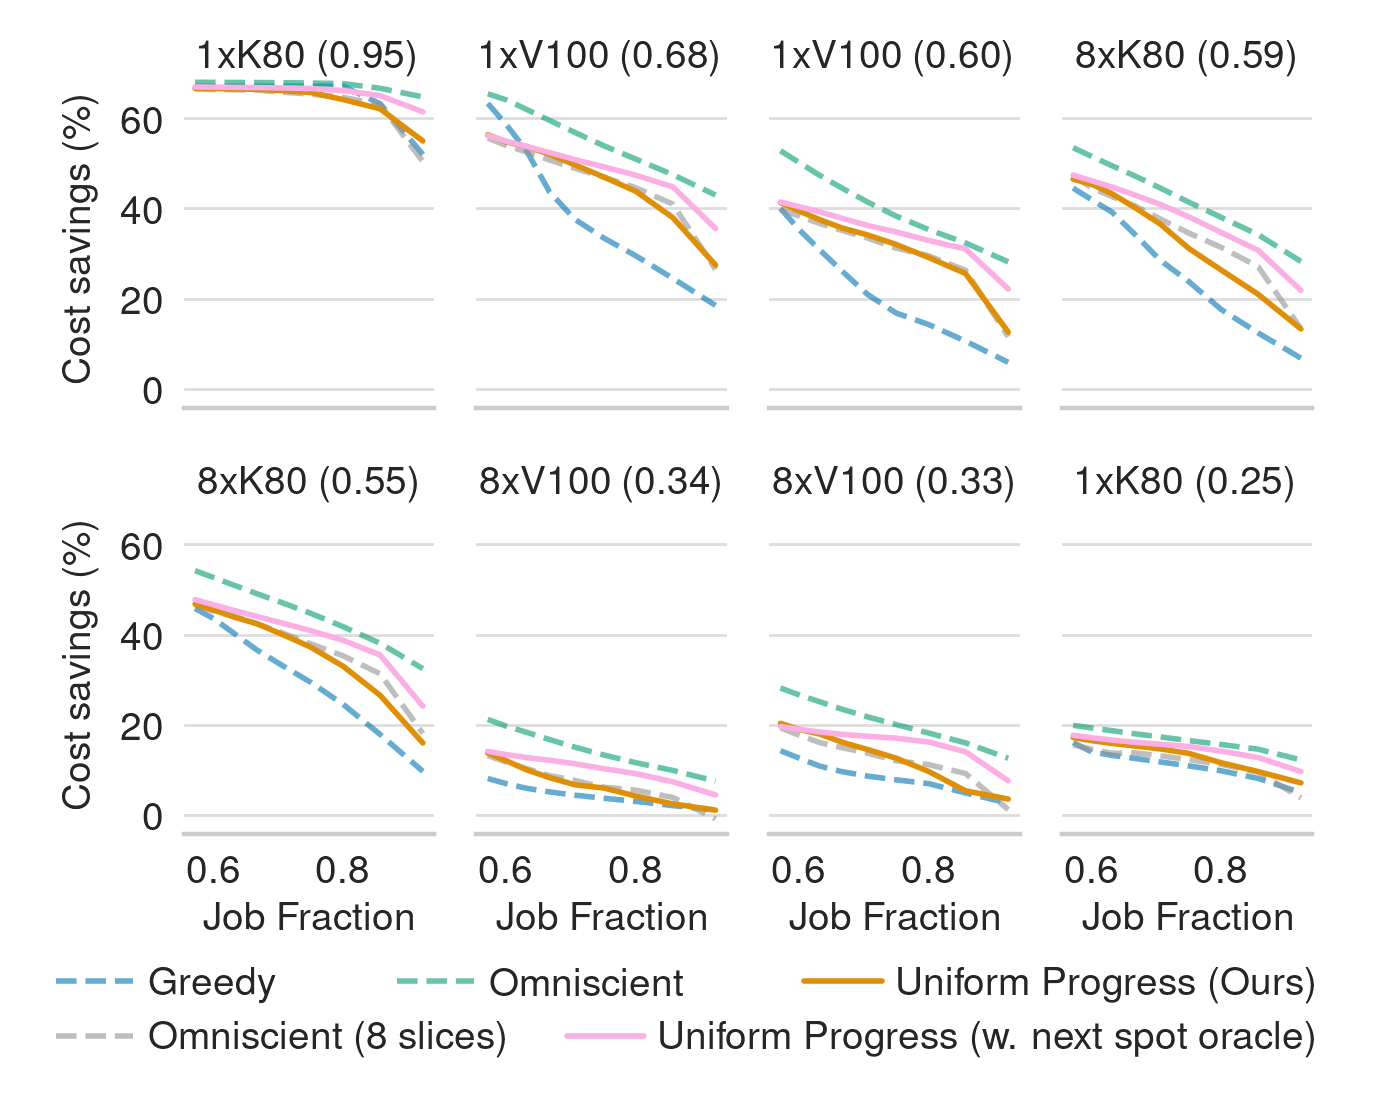

In [27]:
RESTART_OVERHEAD_HOURS = 0.2
df = dfs[np.isclose(dfs['overhead'], RESTART_OVERHEAD_HOURS)]

if is_2_month_data:
    plot_result(df, 'task_fraction', 0.57, 'Job Fraction', 'real_strategies-2months', plot_all=True, ncol=3, xlim=(None, None))
else:
    fig = plot_result(df, 'task_fraction', 0.57, 'Job Fraction', 'real_strategies', plot_all=True, ncol=4, xlim=(None, None))
    axes = fig.get_axes()
    


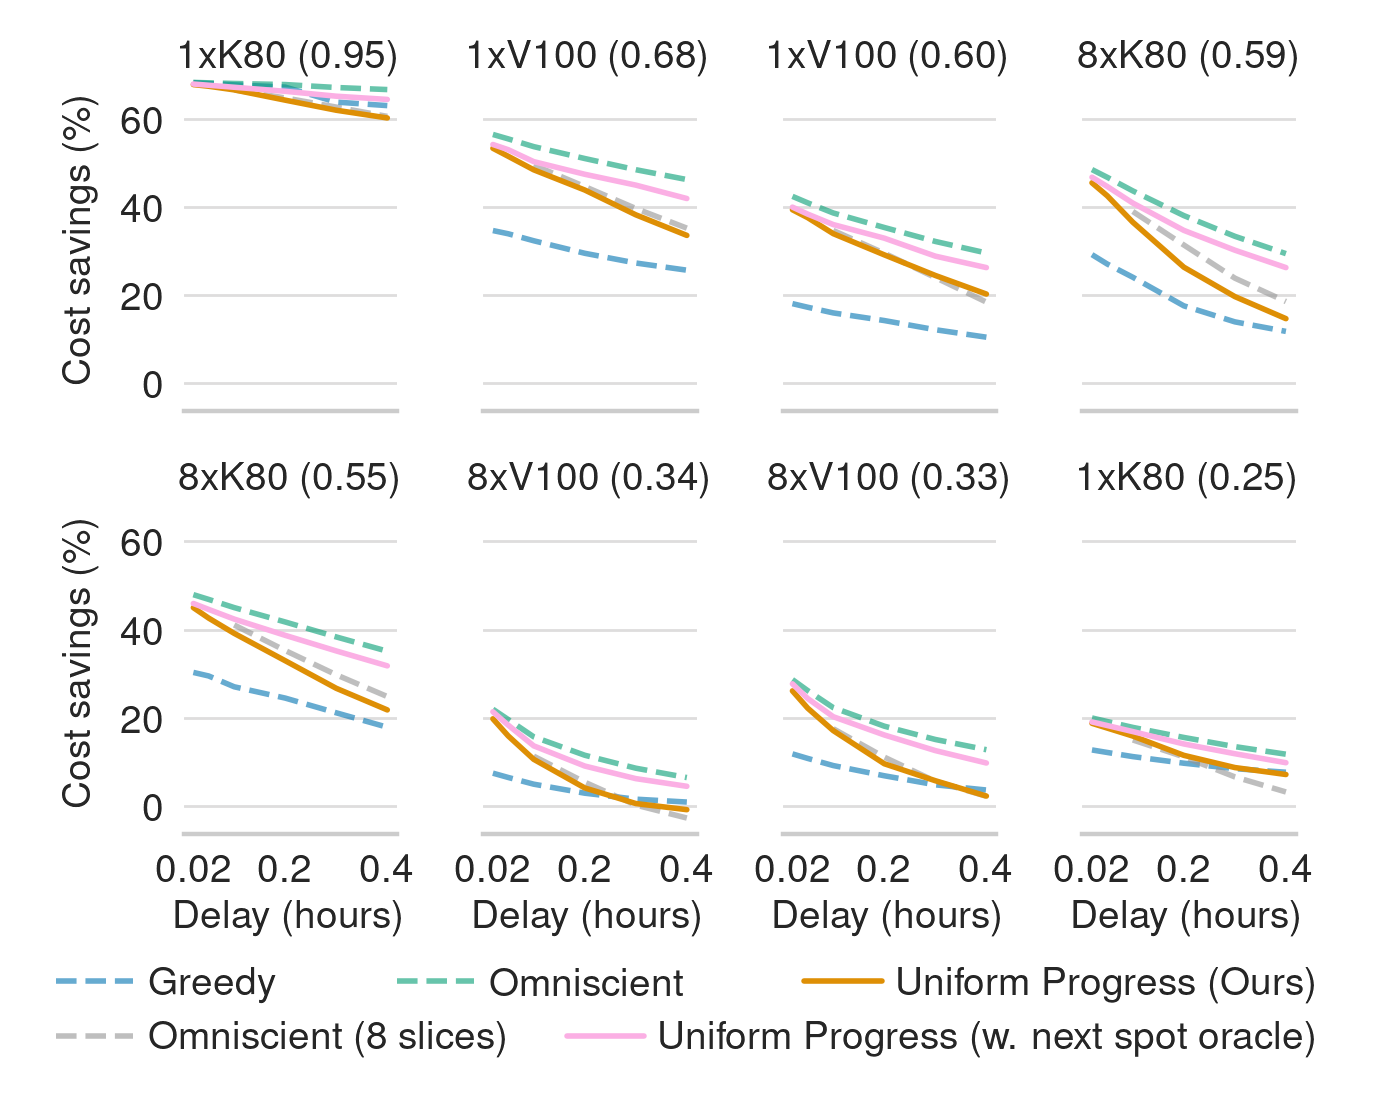

In [28]:
PLOT_DDL = 60
overhead_df = dfs[np.isclose(dfs['deadline_hours'], PLOT_DDL)]

if is_2_month_data:
    plot_result(overhead_df, 'overhead', 0., 'Delay (hours)', 'cost_overhead-2months', plot_all=True, x_axis_max=0.4)
else:
    plot_result(overhead_df, 'overhead', 0., 'Delay (hours)', 'cost_overhead', ncol=4, plot_all=True, x_axis_max=0.4)

In [29]:
raise
NORMALIZE_BY_ON_DEMAND = False
# NORMALIZE_BY_ON_DEMAND = True

x_axis = 'deadline_hours'
# X_AXIS = 'task_fraction'

v100_base_cost = utils.COSTS[utils.ClusterType.ON_DEMAND]
cost_scales = utils.COST_SCALES
if NORMALIZE_BY_ON_DEMAND:
    for name in cost_scales:
        cost_scales[name] = 1

DD_SCALE = 3

OPTIMAL_SLICES = [2, 4, 8, 16]
OPTIMAL_SLICE_HOURS = [24, 12, 6]

strategy_name_map = {
    'on_demand': 'on demand',
    'strawman': 'greedy',
    'ideal_ilp_overhead': 'optimal (sliced 1)',
}
if USE_OPTIMAL_SLICE_HOUR:
    strategy_name_map.update({f'ideal_ilp_overhead_sliced_{s}':f'optimal (sliced {s}h)' for s in OPTIMAL_SLICE_HOURS})
else:
    strategy_name_map.update({f'ideal_ilp_overhead_sliced_by_num_{s}': f'optimal (sliced {s})' for s in OPTIMAL_SLICES})

colors = sns.color_palette('colorblind', n_colors=10)

dfs.sort_values('spot_fraction', inplace=True, ascending=False)
env_paths = dfs['env_path'].unique()
# env_paths = ['us-west-2a_k80_1', 'us-west-2a_v100_1', 'us-west-2b_v100_1', 'us-west-2b_k80_1']

fig = plt.figure(figsize=[fig_width, fig_width / golden_mean], dpi=400)
axes = fig.subplots(len(env_paths) // 2, 2, sharex=True)
# axes = fig.subplots(1, 3, sharex=True)

dashed_strategies = ['on demand', 'greedy']

for i, env_path in enumerate(env_paths):
    df = dfs[dfs['env_path'].str.contains(env_path)]
    name = os.path.basename(env_path)
    device = name.replace('.csv', '').partition('_')[-1]
    cost_scale = cost_scales[device]
    ax = axes[i // 2, i % 2]
    # ax = axes[i]
    ax.set_title(
        name.replace('.csv', '') +
        f'\n(spot frac: {df["spot_fraction"].values[0]:.2f})'
        # f'\navg_spot: {df["avg_spot_hours"].values[0]:.2f}h; avg_wait: {df["avg_wait_hours"].values[0]:.2f}h'
    )
    result_df = pd.DataFrame()
    result_df = pd.concat([
        df[df['strategy'] == 'on_demand'], result_df
    ],
                          ignore_index=True)
    result_df = pd.concat([
        df[df['strategy'] == 'strawman'], result_df
    ],
                          ignore_index=True)
    result_df = pd.concat([
        df[df['strategy'] == 'ideal_ilp_overhead'], result_df
    ],
                          ignore_index=True)
    
    if USE_OPTIMAL_SLICE_HOUR:
        for optimal_slice_hour in OPTIMAL_SLICE_HOURS:
            optimal_slice_df = df[(df['strategy'] == 'ideal_ilp_overhead_sliced')
            & np.isclose(df['slice_interval_hours'], optimal_slice_hour)]
            optimal_slice_df['strategy'] = f'ideal_ilp_overhead_sliced_{optimal_slice_hour}'
            result_df = pd.concat([
                optimal_slice_df, result_df
            ],
                                ignore_index=True)
    else:
        for optimal_slice in OPTIMAL_SLICES:
            optimal_slice_df = df[(df['strategy'] == 'ideal_ilp_overhead_sliced_by_num')
            & (df['num_slices'] == optimal_slice)]
            optimal_slice_df['strategy'] = f'ideal_ilp_overhead_sliced_by_num_{optimal_slice}'
            result_df = pd.concat([
                optimal_slice_df, result_df
            ],
                                ignore_index=True)
    

    if NORMALIZE_BY_ON_DEMAND:
        on_demand_df = result_df[result_df['strategy'] == 'on_demand'][[
            x_axis, 'avg_cost'
        ]]
        result_df = result_df.merge(on_demand_df,
                                    on=x_axis,
                                    suffixes=('', '_on_demand'))
        result_df['avg_cost'] = result_df['avg_cost'] / result_df[
            'avg_cost_on_demand']
        result_df = result_df.drop(columns=['avg_cost_on_demand'])

    result_df = result_df.sort_values(by=[x_axis])
    for origin_name, strategy in strategy_name_map.items():
        strategy_df = result_df[result_df['strategy'] == origin_name]
        linestyle = '-' if strategy not in dashed_strategies else '--'
        sns.lineplot(x=strategy_df[x_axis],
                        y=strategy_df['avg_cost'] * cost_scale,
                        label=strategy,
                        ax=ax,
                        linestyle=linestyle)
    ax.legend().set_visible(False)
    ax.set_ylabel('')
    # ax.set_xlim(None, 80)
    ax.set_xlabel('Deadline R(0) (h)')

for ax in axes[:, 0]:
    # ax = axes[0]
    if NORMALIZE_BY_ON_DEMAND:
        ax.set_ylabel('Nomralized cost by on-demand')
    else:
        ax.set_ylabel(r'Cost (\$)')

fig.subplots_adjust(bottom=0.3)
handler_ax = axes[0, 0]
fig.legend(title='',
           loc='lower center',
           ncol=3,
           handles=handler_ax.get_legend_handles_labels()[0],
           bbox_to_anchor=(0.5, -0.05))
fig.suptitle(
    f'Strategies on real traces (d={RESTART_OVERHEAD_HOURS}h, C(0)={TASK}h)')
fig.tight_layout()
fig.savefig('figures/sliced_optimal.pdf', bbox_inches='tight')
plt.show()

RuntimeError: No active exception to reraise